In [1]:
import matplotlib.pyplot as plt
import arviz as az
import numpy as np
from random import *

# move to previouse directory to access the privugger code
import os, sys
sys.path.append(os.path.join("../../"))

import privugger as pv

# Solution of governor case study

This tutorial is the continuity of the [Governor case study](https://itu-square.github.io/privugger/tutorials/Governor.html) where we propose you a solution.

It shows how privugger can be used analyze the uniqueness of records after elements have been grouped.

## Probability of none mutual information programming

We consider a program that takes a dataset with attributes: `countrie`, `zip` and `age`. 
The program returns a dataset after sorting elements by groups.

As you can see below, we propose you 4 programs. Each one sorts a different number of attributes: from 0 to 3.

Interesting thing to point, we create other numpy arrays where we store sorted data because rewriting on arrays doesn't work with privugger.

### All attributes are sorted by groups

In [2]:
def all_attributes_sorted(countries, zips, ages):
    output = []
    rd_countries = np.repeat(0, countries.size)
    rd_zips = np.repeat(0, zips.size)
    rd_ages = np.repeat(0, ages.size)
    for i in range (100):
        if 50 < countries[i] <= 100 :
            rd_countries[i] = 2
        elif countries[i] <= 50 :
            rd_countries[i] =  1
        elif 100 < countries[i] <= 150 :
            rd_countries[i] =  3
        elif 150 < countries[i] <= 195 :
            rd_countries[i] =  4
        if 25 < zips[i] <= 50 :
            rd_zips[i] = 2
        elif zips[i] <= 25 :
            rd_zips[i] =  1
        elif 50 < zips[i] <= 75 :
            rd_zips[i] =  3
        elif 75 < zips[i] <= 100 :
            rd_zips[i] =  4
        if 1977 < ages[i] <= 1992 :
            rd_ages[i] = 2
        elif ages[i] <= 1977 :
            rd_ages[i] =  1
        elif 1992 < ages[i] <= 2003 :
            rd_ages[i] =  3
    output.append(rd_countries)
    output.append(rd_zips)
    output.append(rd_ages)
    return output

### Zero attribute are sorted by groups

In [3]:
def no_attribute_sorted(countries, zips, ages):
    output = []
    output.append(countries)
    output.append(zips)
    output.append(ages)
    return output

### One attributes is sorted by groups

In [4]:
def one_attribute_sorted(countries, zips, ages):
    output = []
    rd_countries = np.repeat(0, countries.size)
    for i in range (100):
        if 50 < countries[i] <= 100 :
            rd_countries[i] = 2
        elif countries[i] <= 50 :
            rd_countries[i] =  1
        elif 100 < countries[i] <= 150 :
            rd_countries[i] =  3
        elif 150 < countries[i] <= 195 :
            rd_countries[i] =  4
    output.append(rd_countries)
    output.append(zips)
    output.append(ages)
    return output

### Two attributes are sorted by groups

In [5]:
def two_attributes_sorted(countries, zips, ages):
    output = []
    rd_countries = np.repeat(0, countries.size)
    rd_zips = np.repeat(0, zips.size)
    for i in range (100):
        if 50 < countries[i] <= 100 :
            rd_countries[i] = 2
        elif countries[i] <= 50 :
            rd_countries[i] =  1
        elif 100 < countries[i] <= 150 :
            rd_countries[i] =  3
        elif 150 < countries[i] <= 195 :
            rd_countries[i] =  4
        if 25 < zips[i] <= 50 :
            rd_zips[i] = 2
        elif zips[i] <= 25 :
            rd_zips[i] =  1
        elif 50 < zips[i] <= 75 :
            rd_zips[i] =  3
        elif 75 < zips[i] <= 100 :
            rd_zips[i] =  4
    output.append(rd_countries)
    output.append(rd_zips)
    output.append(ages)
    return output

## Input specification

The variable N defines the size of the dataset (N_rv is a point distribution with all probability mass concentrated at N, this is necessary because the input specification must be composed by random variables). In this example, we consider a dataset of size 150.

For `countries`, each number correspond to a country sorted by Alphabetic order. (Example: `1` = Afghanistan)

For `ages`, it corresponds to the birth year of the person. We consider everyone in the dataset is between 18 and 60.

For `zips`, we consider 100 different zips which are not necessarily existing zips. There were choose randomly fro the use of this case.

For these attributes, we sepcfy a uniform distribution over all possible categories.

Finally, we create the `Dataset` object with the complete input spec.

In [6]:
N = 100

# Victim's record

# Spec for the records of others    
countries    = pv.DiscreteUniform("countries", 1, 195, num_elements=N)
ages      = pv.DiscreteUniform("ages", 1962, 2003, num_elements=N)
zips     = pv.DiscreteUniform("zips", 1, 100, num_elements=N)

# Dataset spec
ds = pv.Dataset(input_specs = [countries, zips, ages])


## Program specification

The program specification takes the input specification above, and the program to analyze. The program to analyse depends on how many attributes the user wants to be sorted (between 0 to 3). We give the name `'output'` to the distribution of the output of the program. In this example, it is important to remark that the output of the program is a matrix of ints. In this matrix, each row models a row in the dataset, and each column models an attribute.


In [7]:
while True :
    sorting_way = input("Type the number of attributes you want to sort. (between 0 to 3) ")
    if sorting_way == "0":
        program   = pv.Program('output', dataset=ds, output_type=pv.Matrix(pv.Int), function=no_attribute_sorted)
        break
    elif sorting_way == "1":
        program   = pv.Program('output', dataset=ds, output_type=pv.Matrix(pv.Int), function=one_attribute_sorted)
        break
    elif sorting_way == "2":
        program   = pv.Program('output', dataset=ds, output_type=pv.Matrix(pv.Int), function=two_attributes_sorted)
        break
    elif sorting_way == "3":
        program   = pv.Program('output', dataset=ds, output_type=pv.Matrix(pv.Int), function=all_attributes_sorted)
        break
    else:
        print("Wrong number. Try again.")
        pass

## Inference

We use the pymc3 backend to perform the inference.

In [8]:
trace = pv.infer(program, cores=4, draws=10000, method='pymc3')

Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [countries]
>Metropolis: [zips]
>Metropolis: [ages]
Could not pickle model, sampling singlethreaded.
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [countries]
>Metropolis: [zips]
>Metropolis: [ages]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 62 seconds.


## Privacy Risk Analysis

In this tutorial, we focus on uniqueness queries. That is, we quantify how unique random's record is based on its attribute values.

### How many records share the random's attribute values?

First we compute the average of the number of records that have the same values as random's record.

In [9]:
trace_attr   = lambda attr : np.concatenate([trace.posterior['output'][i][:,attr,:] for i in [0,1]])

countries_op = trace_attr(0)
zips_op      = trace_attr(1)
ages_op      = trace_attr(2)

j = randint(0, 99)

print("Avg. number of rows with rd's countrie: ",sum([np.count_nonzero(countries_op[i]==countries_op[j]) for i in range(0,len(countries_op))])/len(countries_op))
print("Avg. number of rows with rd's zip: ",sum([np.count_nonzero(zips_op[i]==zips_op[j]) for i in range(0,len(zips_op))])/len(zips_op))
print("Avg. number of rows with rd's age: ",sum([np.count_nonzero(ages_op[i]==ages_op[j]) for i in range(0,len(ages_op))])/len(ages_op))

Avg. number of rows with rd's countrie:  26.07375
Avg. number of rows with rd's zip:  24.92805
Avg. number of rows with rd's age:  33.3002


### Attributed based uniqueness histograms

A more interesting perspective is to plot histograms showing the probability of having $n$ records equal to random's attributes.

The plots below show the probability of having $n \in \mathbb{N}$ number of records with: `1)` the same countrie as the random, `2)` the same zip code as the random, `3)` the same age as the random, `4)` the same countrie and the same zip code of the random, `5)` the same age and the same zip of the random, `6)` the same countrie and the same age of the random, `7)` all same attributes as the random. 

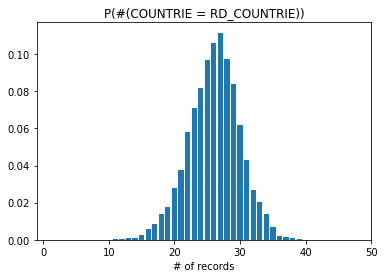

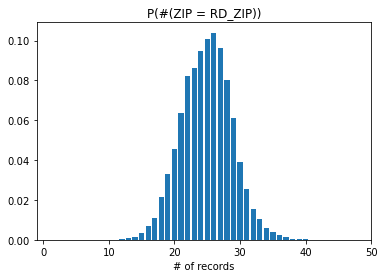

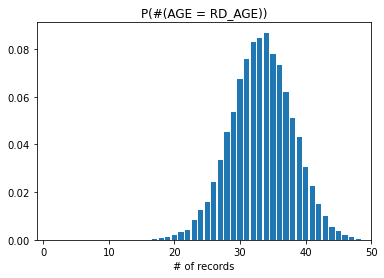

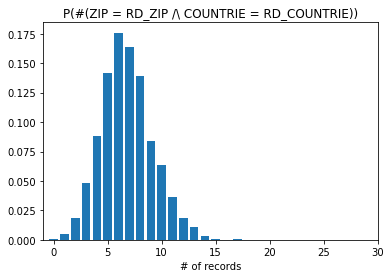

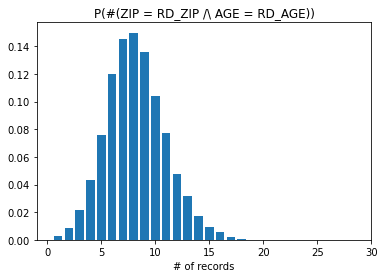

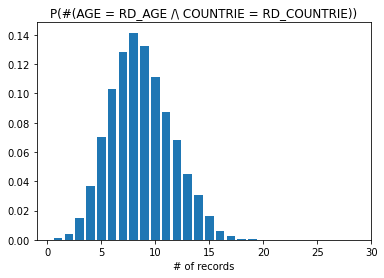

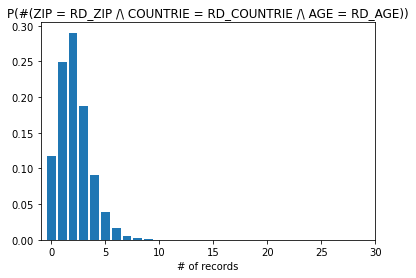

In [10]:
total_samples=len(countries_op)
len_sample=len(countries_op[1])
total_N=N

count_rd_countries=np.array([np.count_nonzero(
    (countries_op[i]==countries_op[j])
) for i in range(0,total_samples)])

count_rd_zips=np.array([np.count_nonzero(
    (zips_op[i]==zips_op[j])
) for i in range(0,total_samples)])

count_rd_ages=np.array([np.count_nonzero(
    (ages_op[i]==ages_op[j])
) for i in range(0,total_samples)])

count_rd_countries_zips=np.array([np.count_nonzero(
    (zips_op[i]==zips_op[j]) &
    (countries_op[i]==countries_op[j])
) for i in range(0,total_samples)])

count_rd_ages_zips=np.array([np.count_nonzero(
    (zips_op[i]==zips_op[j]) &
    (ages_op[i]==ages_op[j])
) for i in range(0,total_samples)])

count_rd_countries_ages=np.array([np.count_nonzero(
    (ages_op[i]==ages_op[j]) &
    (countries_op[i]==countries_op[j])
) for i in range(0,total_samples)])

count_rd_countries_zips_ages=np.array([np.count_nonzero(
    (zips_op[i]==zips_op[j]) &
    (countries_op[i]==countries_op[j]) &
    (ages_op[i]==ages_op[j])
) for i in range(0,total_samples)])


y1=[np.count_nonzero(count_rd_countries==i)/len(count_rd_countries) for i in range(0,total_N)]
y2=[np.count_nonzero(count_rd_zips==i)/len(count_rd_zips) for i in range(0,total_N)]
y3=[np.count_nonzero(count_rd_ages==i)/len(count_rd_ages) for i in range(0,total_N)]
y4=[np.count_nonzero(count_rd_countries_zips==i)/len(count_rd_countries_zips) for i in range(0,total_N)]
y5=[np.count_nonzero(count_rd_ages_zips==i)/len(count_rd_ages_zips) for i in range(0,total_N)]
y6=[np.count_nonzero(count_rd_countries_ages==i)/len(count_rd_countries_ages) for i in range(0,total_N)]
y7=[np.count_nonzero(count_rd_countries_zips_ages==i)/len(count_rd_countries_zips_ages) for i in range(0,total_N)]

plt.bar(range(0,total_N),y1)
plt.title("P(#(COUNTRIE = RD_COUNTRIE))")
plt.xlim((-1,50))
plt.xlabel("# of records")
plt.show()

plt.bar(range(0,total_N),y2)
plt.title("P(#(ZIP = RD_ZIP))")
plt.xlim((-1,50))
plt.xlabel("# of records")
plt.show()

plt.bar(range(0,total_N),y3)
plt.title("P(#(AGE = RD_AGE))")
plt.xlim((-1,50))
plt.xlabel("# of records")
plt.show()

plt.bar(range(0,total_N),y4)
plt.title("P(#(ZIP = RD_ZIP /\ COUNTRIE = RD_COUNTRIE))")
plt.xlim((-1,30))
plt.xlabel("# of records")
plt.show()

plt.bar(range(0,total_N),y5)
plt.title("P(#(ZIP = RD_ZIP /\ AGE = RD_AGE))")
plt.xlim((-1,30))
plt.xlabel("# of records")
plt.show()

plt.bar(range(0,total_N),y6)
plt.title("P(#(AGE = RD_AGE /\ COUNTRIE = RD_COUNTRIE))")
plt.xlim((-1,30))
plt.xlabel("# of records")
plt.show()

plt.bar(range(0,total_N),y7)
plt.title("P(#(ZIP = RD_ZIP /\ COUNTRIE = RD_COUNTRIE /\ AGE = RD_AGE))")
plt.xlim((-1,30))
plt.xlabel("# of records")
plt.show()
